###Respoder los siguientes casos

Considera los datos de las medidas de altura de los estudiantes de Economía de la Unheval en cm.

In [ ]:
medidas = [
    151, 152, 154, 158, 159, 170, 152, 158, 189, 190,
    161, 162, 163, 163, 165, 160, 162, 163, 188, 182,
    166, 166, 166, 167, 167, 178, 173, 167, 187, 178,
    168, 168, 168, 168, 168, 175, 184, 168, 170, 176,
    169, 169, 169, 169, 170, 172, 188, 169, 156, 173,
    170, 170, 171, 171, 187, 168, 150, 174, 177, 170,
    173, 173, 174, 174, 188, 167, 156, 171, 181, 169,
    176, 176, 176, 177, 190, 166, 166, 177, 185, 168,
    179, 179, 180, 180, 190, 186, 162, 181, 152, 166,
    182, 182, 183, 185, 187, 150, 158, 185, 159, 161
]



a.1. Construir la tabla de frecuencia, usando el algoritmo de **Stureges**

In [ ]:
from math import log10

x_min, x_max = min(medidas), max(medidas)
rango = x_max - x_min
clase = round(1 + 3.322 * log10(len(medidas)))
ancho_clase = round(rango / clase)

In [ ]:
# Columna Intervalos
intervalos = [(x_min + i * ancho_clase, x_min + (i + 1) * ancho_clase) for i in range(clase)]

# Columna frecuencia absoluta
def get_frecuecia_absoluta():
    f_absoluta = []
    indice = 0
    for i in intervalos:
        if indice == len(intervalos) - 1:
            f_absoluta.append(len([x for x in medidas if x >= i[0]]))
            break
        f_absoluta.append(len([x for x in medidas if x >= i[0] and x < i[1]]))
        indice+=1

    return f_absoluta

f_absoluta = get_frecuecia_absoluta()

# Columna frecuencia relativa
def get_frecuencia_relativa():
    f_relativa = []
    for i in f_absoluta:
        f_relativa.append(i / len(medidas))

    return f_relativa

f_relativa = get_frecuencia_relativa()

# Columna frecuencia porcentual
def get_frecuencia_porcentual():
    f_porcentual = []
    for i in f_relativa:
        f_porcentual.append(round(i * 100))

    return f_porcentual

f_porcentual = get_frecuencia_porcentual()

get_frecuencia_acumulada = lambda x: [sum(x[:i + 1]) for i in range(len(x))]
# Columna frecuencia absoluta acumulada
f_absoluta_acumulada = get_frecuencia_acumulada(f_absoluta)

# Columna frecuecia relativa acumulada
f_relativa_acumulada = get_frecuencia_acumulada(f_relativa)

# Columna frecuencia porcentual acumulada
f_porcentual_acumulada = get_frecuencia_acumulada(f_porcentual)

In [ ]:
import pandas as pd
# Crear la tabla

tabla_frecuencia = pd.DataFrame({
    "Intervalos": [f"{i[0]} - {i[1]}" for i in intervalos],
    "fi": f_absoluta,
    "hi": f_relativa,
    "%i": [f'{i}%' for i in f_porcentual],
    "Fi": f_absoluta_acumulada,
    "Hi": f_relativa_acumulada,
    "$i": [f'{i}%' for i in f_porcentual_acumulada]
})

tabla_frecuencia

,Intervalos,fi,hi,%i,Fi,Hi,$i
0,150 - 155,7,0.07,7%,7,0.07,7%
1,155 - 160,7,0.07,7%,14,0.14,14%
2,160 - 165,9,0.09,9%,23,0.23,23%
3,165 - 170,25,0.25,25%,48,0.48,48%
4,170 - 175,17,0.17,17%,65,0.65,65%
5,175 - 180,12,0.12,12%,77,0.77,77%
6,180 - 185,9,0.09,9%,86,0.86,86%
7,185 - 190,14,0.14,14%,100,1.00,100%


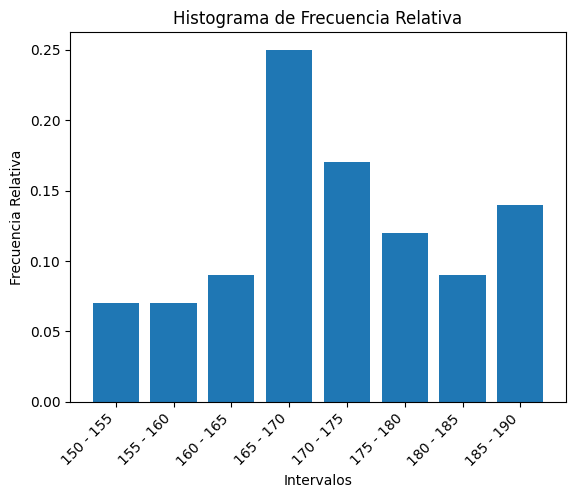

In [ ]:
# prompt: Con DataFrame tabla_frecuencia: Elaborar el histiograma de frecuencia relativa

# Assuming 'tabla_frecuencia' is your DataFrame
# and 'Intervalos' and 'hi' are the columns for the intervals and relative frequency

import matplotlib.pyplot as plt

# Extract the interval ranges from the 'Intervalos' column
intervals = tabla_frecuencia['Intervalos'].tolist()

# Convert relative frequency to a list
relative_freq = tabla_frecuencia['hi'].tolist()

# Plot the histogram
plt.bar(intervals, relative_freq)

# Customize the plot
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia Relativa")
plt.title("Histograma de Frecuencia Relativa")

# Rotate the x-axis labels if they are overlapping
plt.xticks(rotation=45, ha='right')

plt.show()


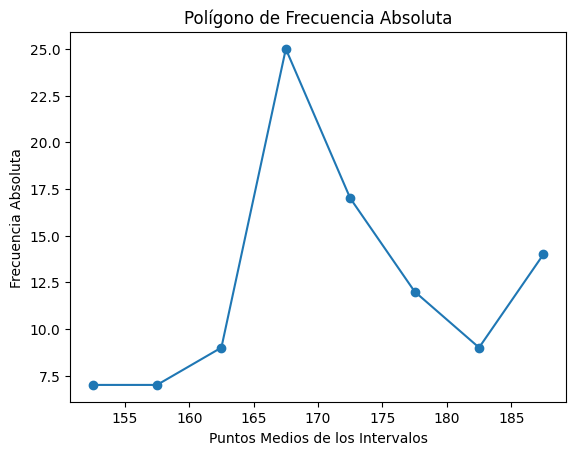

In [ ]:
# prompt: generar el poligono de frecuencia absoluta

import matplotlib.pyplot as plt

# Obtener los puntos medios de los intervalos
puntos_medios = [(intervalo.split('-')[0].strip(), intervalo.split('-')[1].strip()) for intervalo in tabla_frecuencia['Intervalos']]
puntos_medios = [(float(i[0]) + float(i[1])) / 2 for i in puntos_medios]

# Graficar el polígono de frecuencia absoluta
plt.plot(puntos_medios, tabla_frecuencia['fi'], marker='o')

# Etiquetas y título del gráfico
plt.xlabel('Puntos Medios de los Intervalos')
plt.ylabel('Frecuencia Absoluta')
plt.title('Polígono de Frecuencia Absoluta')

# Mostrar el gráfico
plt.show()


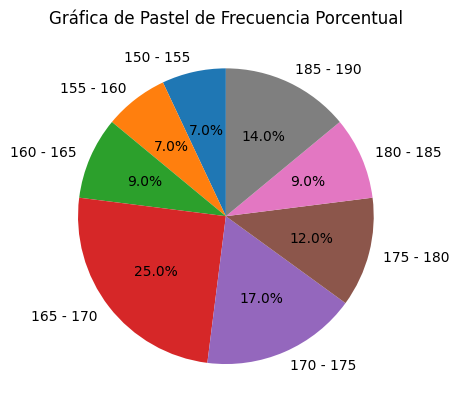

In [ ]:
# prompt: Gráfica de pastel para la frecuencia porcentual

import matplotlib.pyplot as plt
# Crear la gráfica de pastel
plt.pie(tabla_frecuencia['fi'], labels=tabla_frecuencia['Intervalos'], autopct='%1.1f%%', startangle=90)

# Título de la gráfica
plt.title('Gráfica de Pastel de Frecuencia Porcentual')

# Mostrar la gráfica
plt.show()
